# About this Notebook

This notebook will take us through a review of different ways to clean data:

* convert date into datetime type
* remove columns
* remove columns that has more than 50% missing data
* etc.

Note: there are multiple ways to do each of these tasks and many more tasks that may be needed depending on the dataset.

For the purpose of this review, we will use data from Environment Canada of weather readings from Calgary International Airport.

In [217]:
import pandas as pd
import datetime

In [218]:
# Call Environment Canada API
# Siang Lim. 2017. Adapted from Exploring Environment Canada Weather Data with Python and Jupyter Notebooks. 
# https://github.com/csianglim/weather-gc-ca-python/blob/master/Part%20I%20-%20Data%20Extraction%20and%20Cleaning.ipynb
# Accessed on October 30th, 2022

stationID = 50430 #Calgary
months = ["01", "02", "03", "04", "05", "06"] #from January to June
years = ["2021"] #year 2021

weather = []
for month, year in zip(months, years*6):
    base_url = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?"
    query_url = "format=csv&stationID={}&Year={}&Month={}&timeframe=1".format(stationID, year, month)
    api_endpoint = base_url + query_url
    df = pd.read_csv(api_endpoint, skiprows=0)
    weather.append(df)

In [219]:
weather_df = pd.concat(weather, axis=0)
weather_df.head(10)

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-114.01,51.12,CALGARY INTL A,3031092,2021-01-01 00:00,2021,1,1,00:00,-3.2,...,NaN,24.1,NaN,88.37,NaN,NaN,NaN,-8.0,NaN,NaN
1,-114.01,51.12,CALGARY INTL A,3031092,2021-01-01 01:00,2021,1,1,01:00,2.5,...,NaN,24.1,NaN,88.39,NaN,NaN,NaN,NaN,NaN,NaN
2,-114.01,51.12,CALGARY INTL A,3031092,2021-01-01 02:00,2021,1,1,02:00,2.0,...,NaN,24.1,NaN,88.43,NaN,NaN,NaN,NaN,NaN,Clear
3,-114.01,51.12,CALGARY INTL A,3031092,2021-01-01 03:00,2021,1,1,03:00,2.4,...,NaN,24.1,NaN,88.47,NaN,NaN,NaN,NaN,NaN,NaN
4,-114.01,51.12,CALGARY INTL A,3031092,2021-01-01 04:00,2021,1,1,04:00,2.4,...,NaN,24.1,NaN,88.46,NaN,NaN,NaN,NaN,NaN,NaN
5,-114.01,51.12,CALGARY INTL A,3031092,2021-01-01 05:00,2021,1,1,05:00,-2.3,...,NaN,24.1,NaN,88.43,NaN,NaN,NaN,-7.0,NaN,Mostly Cloudy
6,-114.01,51.12,CALGARY INTL A,3031092,2021-01-01 06:00,2021,1,1,06:00,-2.5,...,NaN,24.1,NaN,88.44,NaN,NaN,NaN,-7.0,NaN,NaN
7,-114.01,51.12,CALGARY INTL A,3031092,2021-01-01 07:00,2021,1,1,07:00,-1.7,...,NaN,24.1,NaN,88.38,NaN,NaN,NaN,-5.0,NaN,NaN
8,-114.01,51.12,CALGARY INTL A,3031092,2021-01-01 08:00,2021,1,1,08:00,-3.6,...,NaN,32.2,NaN,88.32,NaN,NaN,NaN,-8.0,NaN,Mainly Clear
9,-114.01,51.12,CALGARY INTL A,3031092,2021-01-01 09:00,2021,1,1,09:00,-2.1,...,NaN,64.4,NaN,88.27,NaN,NaN,NaN,-6.0,NaN,NaN


## Change data type

In [220]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4344 entries, 0 to 719
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Longitude (x)        4344 non-null   float64
 1   Latitude (y)         4344 non-null   float64
 2   Station Name         4344 non-null   object 
 3   Climate ID           4344 non-null   int64  
 4   Date/Time (LST)      4344 non-null   object 
 5   Year                 4344 non-null   int64  
 6   Month                4344 non-null   int64  
 7   Day                  4344 non-null   int64  
 8   Time (LST)           4344 non-null   object 
 9   Temp (°C)            4339 non-null   float64
 10  Temp Flag            2 non-null      object 
 11  Dew Point Temp (°C)  4337 non-null   float64
 12  Dew Point Temp Flag  4 non-null      object 
 13  Rel Hum (%)          4339 non-null   float64
 14  Rel Hum Flag         2 non-null      object 
 15  Precip. Amount (mm)  0 non-null      fl

## Dates

A date in Python is not a data type of its own, but we can import a module named `datetime` to work with dates as date objects.

In [221]:
import datetime

weather_df['Date/Time (LST)']

#What are some other ways you can select a row/column?


0      2021-01-01 00:00
1      2021-01-01 01:00
2      2021-01-01 02:00
3      2021-01-01 03:00
4      2021-01-01 04:00
             ...       
715    2021-06-30 19:00
716    2021-06-30 20:00
717    2021-06-30 21:00
718    2021-06-30 22:00
719    2021-06-30 23:00
Name: Date/Time (LST), Length: 4344, dtype: object

In [222]:
weather_df['Date/Time (LST)'].dtype.name
# What does dtype('O') mean?

'object'

Pandas To Datetime (`.to_datetime()`) will convert your string representation of a date to an actual date format. 

In [223]:
weather_df['Date/Time (LST)'] = pd.to_datetime(weather_df['Date/Time (LST)'])
weather_df.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-114.01,51.12,CALGARY INTL A,3031092,2021-01-01 00:00:00,2021,1,1,00:00,-3.2,...,NaN,24.1,NaN,88.37,NaN,NaN,NaN,-8.0,NaN,NaN
1,-114.01,51.12,CALGARY INTL A,3031092,2021-01-01 01:00:00,2021,1,1,01:00,2.5,...,NaN,24.1,NaN,88.39,NaN,NaN,NaN,NaN,NaN,NaN
2,-114.01,51.12,CALGARY INTL A,3031092,2021-01-01 02:00:00,2021,1,1,02:00,2.0,...,NaN,24.1,NaN,88.43,NaN,NaN,NaN,NaN,NaN,Clear
3,-114.01,51.12,CALGARY INTL A,3031092,2021-01-01 03:00:00,2021,1,1,03:00,2.4,...,NaN,24.1,NaN,88.47,NaN,NaN,NaN,NaN,NaN,NaN
4,-114.01,51.12,CALGARY INTL A,3031092,2021-01-01 04:00:00,2021,1,1,04:00,2.4,...,NaN,24.1,NaN,88.46,NaN,NaN,NaN,NaN,NaN,NaN


Doesn't look any different, but if we check the type now:

In [231]:
weather_df['Date/Time (LST)'].dtype.name

'datetime64[ns]'

In [225]:
df2 = weather_df[weather_df['Date/Time (LST)'] > '2021-01-20']
df2

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
457,-114.01,51.12,CALGARY INTL A,3031092,2021-01-20 01:00:00,2021,1,20,01:00,-3.4,...,NaN,24.1,NaN,88.11,NaN,NaN,NaN,-6.0,NaN,NaN
458,-114.01,51.12,CALGARY INTL A,3031092,2021-01-20 02:00:00,2021,1,20,02:00,-4.5,...,NaN,24.1,NaN,88.16,NaN,NaN,NaN,-8.0,NaN,Clear
459,-114.01,51.12,CALGARY INTL A,3031092,2021-01-20 03:00:00,2021,1,20,03:00,-5.1,...,NaN,24.1,NaN,88.23,NaN,NaN,NaN,-9.0,NaN,NaN
460,-114.01,51.12,CALGARY INTL A,3031092,2021-01-20 04:00:00,2021,1,20,04:00,-5.5,...,NaN,24.1,NaN,88.25,NaN,NaN,NaN,-6.0,NaN,NaN
461,-114.01,51.12,CALGARY INTL A,3031092,2021-01-20 05:00:00,2021,1,20,05:00,-6.6,...,NaN,24.1,NaN,88.25,NaN,NaN,NaN,-9.0,NaN,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-114.01,51.12,CALGARY INTL A,3031092,2021-06-30 19:00:00,2021,6,30,19:00,32.8,...,NaN,48.3,NaN,88.95,NaN,32.0,NaN,NaN,NaN,NaN
716,-114.01,51.12,CALGARY INTL A,3031092,2021-06-30 20:00:00,2021,6,30,20:00,30.7,...,NaN,48.3,NaN,88.94,NaN,31.0,NaN,NaN,NaN,Clear
717,-114.01,51.12,CALGARY INTL A,3031092,2021-06-30 21:00:00,2021,6,30,21:00,28.0,...,NaN,32.2,NaN,88.94,NaN,28.0,NaN,NaN,NaN,NaN
718,-114.01,51.12,CALGARY INTL A,3031092,2021-06-30 22:00:00,2021,6,30,22:00,26.6,...,NaN,24.1,NaN,88.93,NaN,26.0,NaN,NaN,NaN,NaN


In [226]:
df2[df2['Date/Time (LST)'].dt.dayofweek == 6]

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
552,-114.01,51.12,CALGARY INTL A,3031092,2021-01-24 00:00:00,2021,1,24,00:00,-16.0,...,NaN,2.0,NaN,88.28,NaN,NaN,NaN,-22.0,NaN,"Snow,Fog"
553,-114.01,51.12,CALGARY INTL A,3031092,2021-01-24 01:00:00,2021,1,24,01:00,-16.2,...,NaN,2.0,NaN,88.20,NaN,NaN,NaN,-23.0,NaN,"Snow,Fog"
554,-114.01,51.12,CALGARY INTL A,3031092,2021-01-24 02:00:00,2021,1,24,02:00,-15.8,...,NaN,1.6,NaN,88.18,NaN,NaN,NaN,-22.0,NaN,"Snow,Fog"
555,-114.01,51.12,CALGARY INTL A,3031092,2021-01-24 03:00:00,2021,1,24,03:00,-15.5,...,NaN,2.4,NaN,88.15,NaN,NaN,NaN,-23.0,NaN,"Snow,Fog"
556,-114.01,51.12,CALGARY INTL A,3031092,2021-01-24 04:00:00,2021,1,24,04:00,-15.6,...,NaN,3.2,NaN,88.13,NaN,NaN,NaN,-23.0,NaN,"Snow,Fog"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,-114.01,51.12,CALGARY INTL A,3031092,2021-06-27 19:00:00,2021,6,27,19:00,27.9,...,NaN,24.1,NaN,89.67,NaN,30.0,NaN,NaN,NaN,NaN
644,-114.01,51.12,CALGARY INTL A,3031092,2021-06-27 20:00:00,2021,6,27,20:00,26.8,...,NaN,48.3,NaN,89.65,NaN,29.0,NaN,NaN,NaN,Clear
645,-114.01,51.12,CALGARY INTL A,3031092,2021-06-27 21:00:00,2021,6,27,21:00,25.1,...,NaN,64.4,NaN,89.64,NaN,27.0,NaN,NaN,NaN,NaN
646,-114.01,51.12,CALGARY INTL A,3031092,2021-06-27 22:00:00,2021,6,27,22:00,23.9,...,NaN,32.2,NaN,89.64,NaN,26.0,NaN,NaN,NaN,NaN


In [227]:
weather_df['Time (LST)'] = pd.to_datetime((weather_df['Time (LST)']))
morning = weather_df.set_index('Time (LST)').between_time('6:00:00','9:00:00') 
morning

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Time (LST),,,,,,,,,,,,,,,,,,,,,
2022-10-31 06:00:00,-114.01,51.12,CALGARY INTL A,3031092,2021-01-01 06:00:00,2021,1,1,-2.5,NaN,...,NaN,24.1,NaN,88.44,NaN,NaN,NaN,-7.0,NaN,NaN
2022-10-31 07:00:00,-114.01,51.12,CALGARY INTL A,3031092,2021-01-01 07:00:00,2021,1,1,-1.7,NaN,...,NaN,24.1,NaN,88.38,NaN,NaN,NaN,-5.0,NaN,NaN
2022-10-31 08:00:00,-114.01,51.12,CALGARY INTL A,3031092,2021-01-01 08:00:00,2021,1,1,-3.6,NaN,...,NaN,32.2,NaN,88.32,NaN,NaN,NaN,-8.0,NaN,Mainly Clear
2022-10-31 09:00:00,-114.01,51.12,CALGARY INTL A,3031092,2021-01-01 09:00:00,2021,1,1,-2.1,NaN,...,NaN,64.4,NaN,88.27,NaN,NaN,NaN,-6.0,NaN,NaN
2022-10-31 06:00:00,-114.01,51.12,CALGARY INTL A,3031092,2021-01-02 06:00:00,2021,1,2,2.7,NaN,...,NaN,24.1,NaN,87.23,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 09:00:00,-114.01,51.12,CALGARY INTL A,3031092,2021-06-29 09:00:00,2021,6,29,30.4,NaN,...,NaN,24.1,NaN,89.28,NaN,33.0,NaN,NaN,NaN,NaN
2022-10-31 06:00:00,-114.01,51.12,CALGARY INTL A,3031092,2021-06-30 06:00:00,2021,6,30,20.4,NaN,...,NaN,48.3,NaN,89.17,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-31 07:00:00,-114.01,51.12,CALGARY INTL A,3031092,2021-06-30 07:00:00,2021,6,30,22.7,NaN,...,NaN,64.4,NaN,89.17,NaN,25.0,NaN,NaN,NaN,NaN


## Missing values

In [228]:
features=weather_df.columns.values

missing_val=weather_df.isnull().sum()
non_missing_val= weather_df.notnull().sum()
total_val=weather_df.shape[0]
percentage_missing=missing_val/total_val*100
percentage_missing

Longitude (x)            0.000000
Latitude (y)             0.000000
Station Name             0.000000
Climate ID               0.000000
Date/Time (LST)          0.000000
Year                     0.000000
Month                    0.000000
Day                      0.000000
Time (LST)               0.000000
Temp (°C)                0.115101
Temp Flag               99.953959
Dew Point Temp (°C)      0.161142
Dew Point Temp Flag     99.907919
Rel Hum (%)              0.115101
Rel Hum Flag            99.953959
Precip. Amount (mm)    100.000000
Precip. Amount Flag    100.000000
Wind Dir (10s deg)       0.161142
Wind Dir Flag          100.000000
Wind Spd (km/h)          0.069061
Wind Spd Flag          100.000000
Visibility (km)          0.069061
Visibility Flag        100.000000
Stn Press (kPa)          0.115101
Stn Press Flag          99.953959
Hmdx                    96.109576
Hmdx Flag              100.000000
Wind Chill              64.894107
Wind Chill Flag        100.000000
Weather       

1. Drop missing values: The easiest way to handle them is to simply drop all the rows that contain missing values. If you don’t want to figure out why the values are missing and just have a small percentage of missing values you can just drop them using the following command:

Remove columns that contain 100% missing values.

Remove the columns that have more than 50% missing values.

2. Imputation: Imputation is the process of replacing the null/missing values with some value. For numeric columns, one option is to replace each missing entry in the column with the mean value or median value. Another option could be generating random numbers between a range of values suitable for the column. The range could be between the mean and standard deviation of the column.

In [229]:
# Find the missing values for wind direction and compare these methods of filling missing values.

#df.fillna(0)
#df.fillna(df['Wind Dir (10s deg)'].mean())
#weather_df['Wind Dir (10s deg)'] = weather_df['Wind Dir (10s deg)'].interpolate()

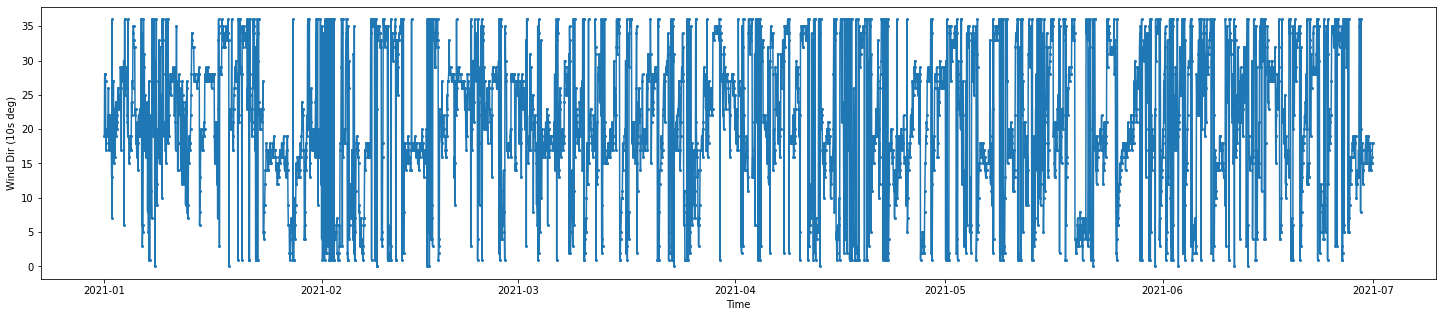

In [235]:
# try visualizing some features with missing data after different imputations

import matplotlib

%matplotlib inline
fig = plt.figure(figsize=(25,5))
plt.plot(weather_df['Date/Time (LST)'], weather_df['Wind Dir (10s deg)'], '-o', markersize=2)
plt.ylabel('Wind Dir (10s deg)')
plt.xlabel('Time')
plt.show()